In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
# Import API key
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime
from citipy import citipy

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

60.37590448628055 27.92933945127544
7.077453693043637 -78.66461641280843
-77.13804539453336 -122.18543511811029
37.82554756631944 8.422722960453285
-88.14610520658181 23.344819770018972
-25.619707926735757 -78.28664440925532
-85.83137988849802 -157.4692054296379
-6.22085560334763 94.91880531341798
28.47238622703982 173.1504601880551
-70.07714796075905 12.005720030077754
33.27326367557343 59.25677774176455
-78.59475828427277 126.35906324716774
-78.57414343498488 72.7286274691105
-57.78340843288464 141.2783771756633
20.733950785070306 28.80305256688004
-34.20350084873098 -131.31664901338465
43.80755904299431 -55.97533926956041
-84.12796559808045 171.64401129975585
47.867779984717544 93.1713452947875
40.518189574870746 1.880671266588763
-3.6347976641527566 138.06219942592435
53.630884763946796 -148.07221464684076
27.794310237381453 -1.3183682948291278
-52.039053487976915 -26.316646045539272
-53.54358278754695 -143.49815814825376
-29.60076506789767 143.10593816624345
-25.685022029031046 79

11.488668021007726 -141.11753105030118
-30.804246495334446 62.39795416939637
-23.20258861414473 142.63062584754863
-68.87812530435379 -90.57418461218934
61.925632328556674 -10.924788117398379
-14.06318137888492 51.1785727618234
48.063652726634814 142.76585936495218
-4.008781117934234 -154.97160209483124
55.84130524517056 -62.63356144346113
88.14147213863535 37.546880254627155
-46.61849138229798 -88.40445244734005
53.704619424785676 142.54199163089214
-73.50848083148281 65.1527358841071
-19.910915776299547 -107.23138201357675
-8.911729267948928 117.99319558326005
89.49184984280652 31.45792967141864
39.46564851867433 55.00724139809452
66.41408401814022 -162.6202621856134
-69.21559874248666 165.94907621556644
24.163069455822537 170.33855965017648
70.01271027322409 86.34814300133644
-46.46373313894782 107.79204046063688
53.2098724186782 153.78361537167154
0.5537354800368774 -160.6151283336724
-32.962376773173915 23.519463973451508
-33.5893577069879 -8.431070337516502


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

585

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | primorsk
Processing Record 2 of Set 12 | jaque
Processing Record 3 of Set 12 | rikitea
Processing Record 4 of Set 12 | tabarqah
City not found. Skipping...
Processing Record 5 of Set 12 | bredasdorp
Processing Record 6 of Set 12 | taltal
Processing Record 7 of Set 12 | mataura
Processing Record 8 of Set 12 | padang
Processing Record 9 of Set 12 | butaritari
Processing Record 10 of Set 12 | hermanus
Processing Record 11 of Set 12 | birjand
Processing Record 12 of Set 12 | new norfolk
Processing Record 13 of Set 12 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 12 | marawi
Processing Record 15 of Set 12 | saint-pierre
Processing Record 16 of Set 12 | bluff
Processing Record 17 of Set 12 | ulaangom
Processing Record 18 of Set 12 | sitges
Processing Record 19 of Set 12 | nabire
Processing Record 20 of Set 12 | kodiak
Processing Record 21 of Set 12 | adrar
Processing Record 22 of

Processing Record 32 of Set 15 | nome
Processing Record 33 of Set 15 | thompson
Processing Record 34 of Set 15 | esperance
Processing Record 35 of Set 15 | felanitx
Processing Record 36 of Set 15 | baykit
Processing Record 37 of Set 15 | caravelas
Processing Record 38 of Set 15 | chokurdakh
Processing Record 39 of Set 15 | hilo
Processing Record 40 of Set 15 | saint-joseph
Processing Record 41 of Set 15 | iqaluit
Processing Record 42 of Set 15 | gornopravdinsk
Processing Record 43 of Set 15 | kavaratti
Processing Record 44 of Set 15 | bethel
Processing Record 45 of Set 15 | arraial do cabo
Processing Record 46 of Set 15 | tilichiki
Processing Record 47 of Set 15 | mahebourg
Processing Record 48 of Set 15 | wattegama
Processing Record 49 of Set 15 | nazarovo
Processing Record 50 of Set 15 | ouadda
Processing Record 1 of Set 16 | sao filipe
Processing Record 2 of Set 16 | cabo san lucas
Processing Record 3 of Set 16 | panzhihua
Processing Record 4 of Set 16 | buala
Processing Record 5 of

City not found. Skipping...
Processing Record 14 of Set 19 | ukiah
Processing Record 15 of Set 19 | mrirt
City not found. Skipping...
Processing Record 16 of Set 19 | van
Processing Record 17 of Set 19 | dubbo
Processing Record 18 of Set 19 | puerto leguizamo
Processing Record 19 of Set 19 | raposa
Processing Record 20 of Set 19 | yeppoon
Processing Record 21 of Set 19 | pergamino
Processing Record 22 of Set 19 | tocopilla
Processing Record 23 of Set 19 | kodinsk
Processing Record 24 of Set 19 | kjollefjord
Processing Record 25 of Set 19 | cedar city
Processing Record 26 of Set 19 | tateyama
Processing Record 27 of Set 19 | bowen
Processing Record 28 of Set 19 | uglegorsk
Processing Record 29 of Set 19 | khudumelapye
Processing Record 30 of Set 19 | san cristobal
Processing Record 31 of Set 19 | syasstroy
Processing Record 32 of Set 19 | babanusah
City not found. Skipping...
Processing Record 33 of Set 19 | krasnoye
Processing Record 34 of Set 19 | pimentel
Processing Record 35 of Set 

Processing Record 50 of Set 22 | san quintin
Processing Record 1 of Set 23 | northam
Processing Record 2 of Set 23 | safaga
Processing Record 3 of Set 23 | eldikan
City not found. Skipping...
Processing Record 4 of Set 23 | rusera
Processing Record 5 of Set 23 | ngukurr
City not found. Skipping...
Processing Record 6 of Set 23 | finschhafen
Processing Record 7 of Set 23 | halifax
Processing Record 8 of Set 23 | vila velha
Processing Record 9 of Set 23 | mehran
Processing Record 10 of Set 23 | san patricio
Processing Record 11 of Set 23 | masuguru
Processing Record 12 of Set 23 | krosno odrzanskie
Processing Record 13 of Set 23 | san policarpo
Processing Record 14 of Set 23 | raudeberg
Processing Record 15 of Set 23 | louisbourg
City not found. Skipping...
Processing Record 16 of Set 23 | lang suan
Processing Record 17 of Set 23 | rabat
Processing Record 18 of Set 23 | nenjiang
Processing Record 19 of Set 23 | bogande
Processing Record 20 of Set 23 | guhagar
Processing Record 21 of Set 

In [9]:
len(city_data)

527

In [10]:
# Convert the array of dictionaries to a DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Primorsk,46.7348,36.3443,57.87,73,97,17.29,UA,2022-05-21 02:52:54
1,Jaque,7.5175,-78.1703,77.02,89,100,2.71,PA,2022-05-21 02:52:54
2,Rikitea,-23.1203,-134.9692,74.14,77,7,7.63,PF,2022-05-21 02:52:55
3,Bredasdorp,-34.5322,20.0403,50.04,84,37,6.13,ZA,2022-05-21 02:52:55
4,Taltal,-25.4000,-70.4833,62.78,67,88,2.93,CL,2022-05-21 02:52:56
5,Mataura,-46.1927,168.8643,43.34,90,100,14.81,NZ,2022-05-21 02:52:56
6,Padang,-0.9492,100.3543,84.58,67,96,2.77,ID,2022-05-21 02:52:56
7,Butaritari,3.0707,172.7902,81.50,72,63,12.62,KI,2022-05-21 02:52:57
8,Hermanus,-34.4187,19.2345,56.19,74,38,4.03,ZA,2022-05-21 02:52:57
9,Birjand,32.8663,59.2211,74.86,19,1,3.02,IR,2022-05-21 02:52:58


In [11]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Primorsk,UA,2022-05-21 02:52:54,46.7348,36.3443,57.87,73,97,17.29
1,Jaque,PA,2022-05-21 02:52:54,7.5175,-78.1703,77.02,89,100,2.71
2,Rikitea,PF,2022-05-21 02:52:55,-23.1203,-134.9692,74.14,77,7,7.63
3,Bredasdorp,ZA,2022-05-21 02:52:55,-34.5322,20.0403,50.04,84,37,6.13
4,Taltal,CL,2022-05-21 02:52:56,-25.4000,-70.4833,62.78,67,88,2.93
5,Mataura,NZ,2022-05-21 02:52:56,-46.1927,168.8643,43.34,90,100,14.81
6,Padang,ID,2022-05-21 02:52:56,-0.9492,100.3543,84.58,67,96,2.77
7,Butaritari,KI,2022-05-21 02:52:57,3.0707,172.7902,81.50,72,63,12.62
8,Hermanus,ZA,2022-05-21 02:52:57,-34.4187,19.2345,56.19,74,38,4.03
9,Birjand,IR,2022-05-21 02:52:58,32.8663,59.2211,74.86,19,1,3.02


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

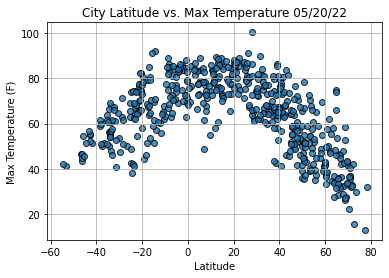

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

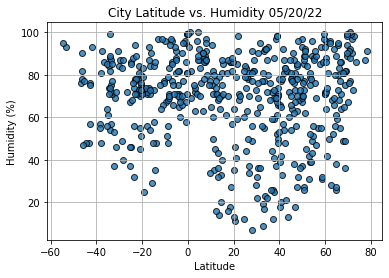

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

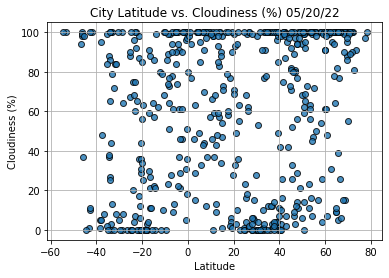

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

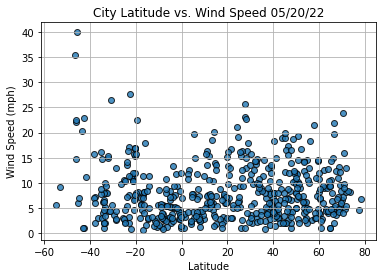

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                        Bluff
Country                        NZ
Date          2022-05-21 02:53:00
Lat                         -46.6
Lng                      168.3333
Max Temp                    46.49
Humidity                       76
Cloudiness                     94
Wind Speed                  35.41
Name: 13, dtype: object

In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Primorsk,UA,2022-05-21 02:52:54,46.7348,36.3443,57.87,73,97,17.29
1,Jaque,PA,2022-05-21 02:52:54,7.5175,-78.1703,77.02,89,100,2.71
7,Butaritari,KI,2022-05-21 02:52:57,3.0707,172.7902,81.50,72,63,12.62
9,Birjand,IR,2022-05-21 02:52:58,32.8663,59.2211,74.86,19,1,3.02
11,Marawi,PH,2022-05-21 02:52:59,7.9986,124.2928,72.97,91,100,1.28


In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

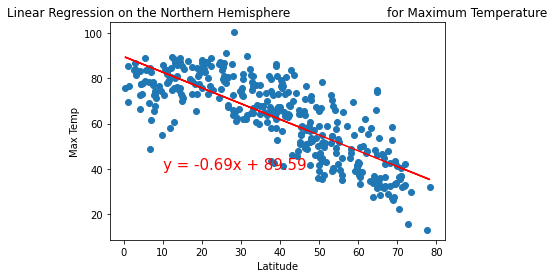

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

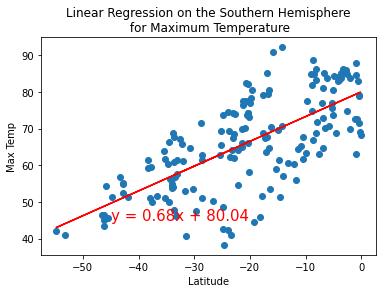

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Maximum Temperature',
                       'Max Temp',(-45,45))

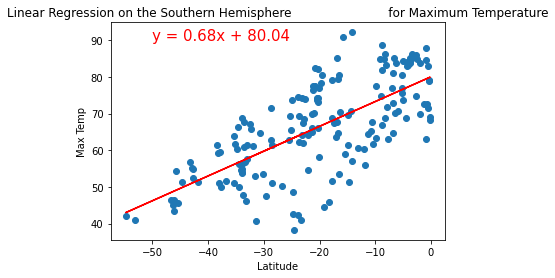

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

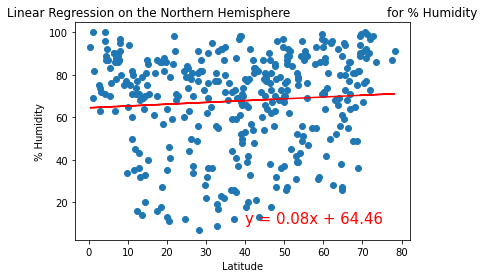

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

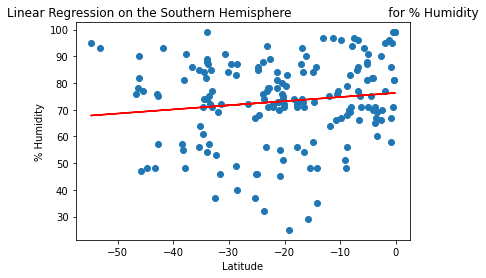

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

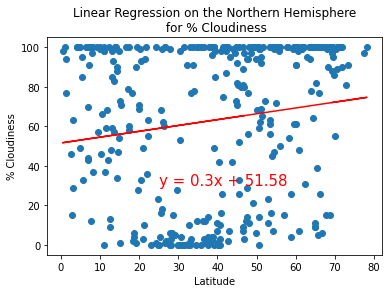

In [28]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Cloudiness',
                       '% Cloudiness',
                       (25,30))

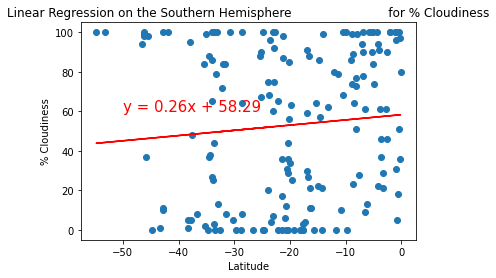

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

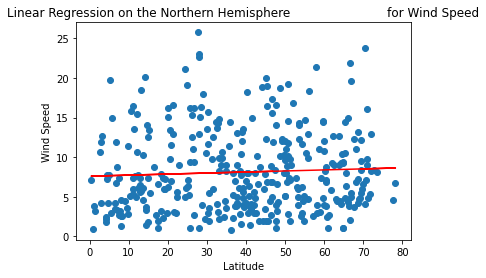

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

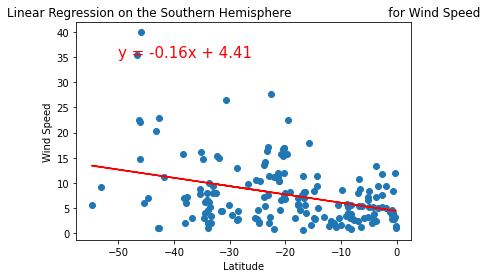

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))